In [99]:
from sklearn import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals.six import StringIO  
from IPython.display import Image
%matplotlib inline
plt.style.use('ggplot')

In [55]:
# Loading the Data
df = pd.read_csv("Carseats.csv")

In [56]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.4+ KB


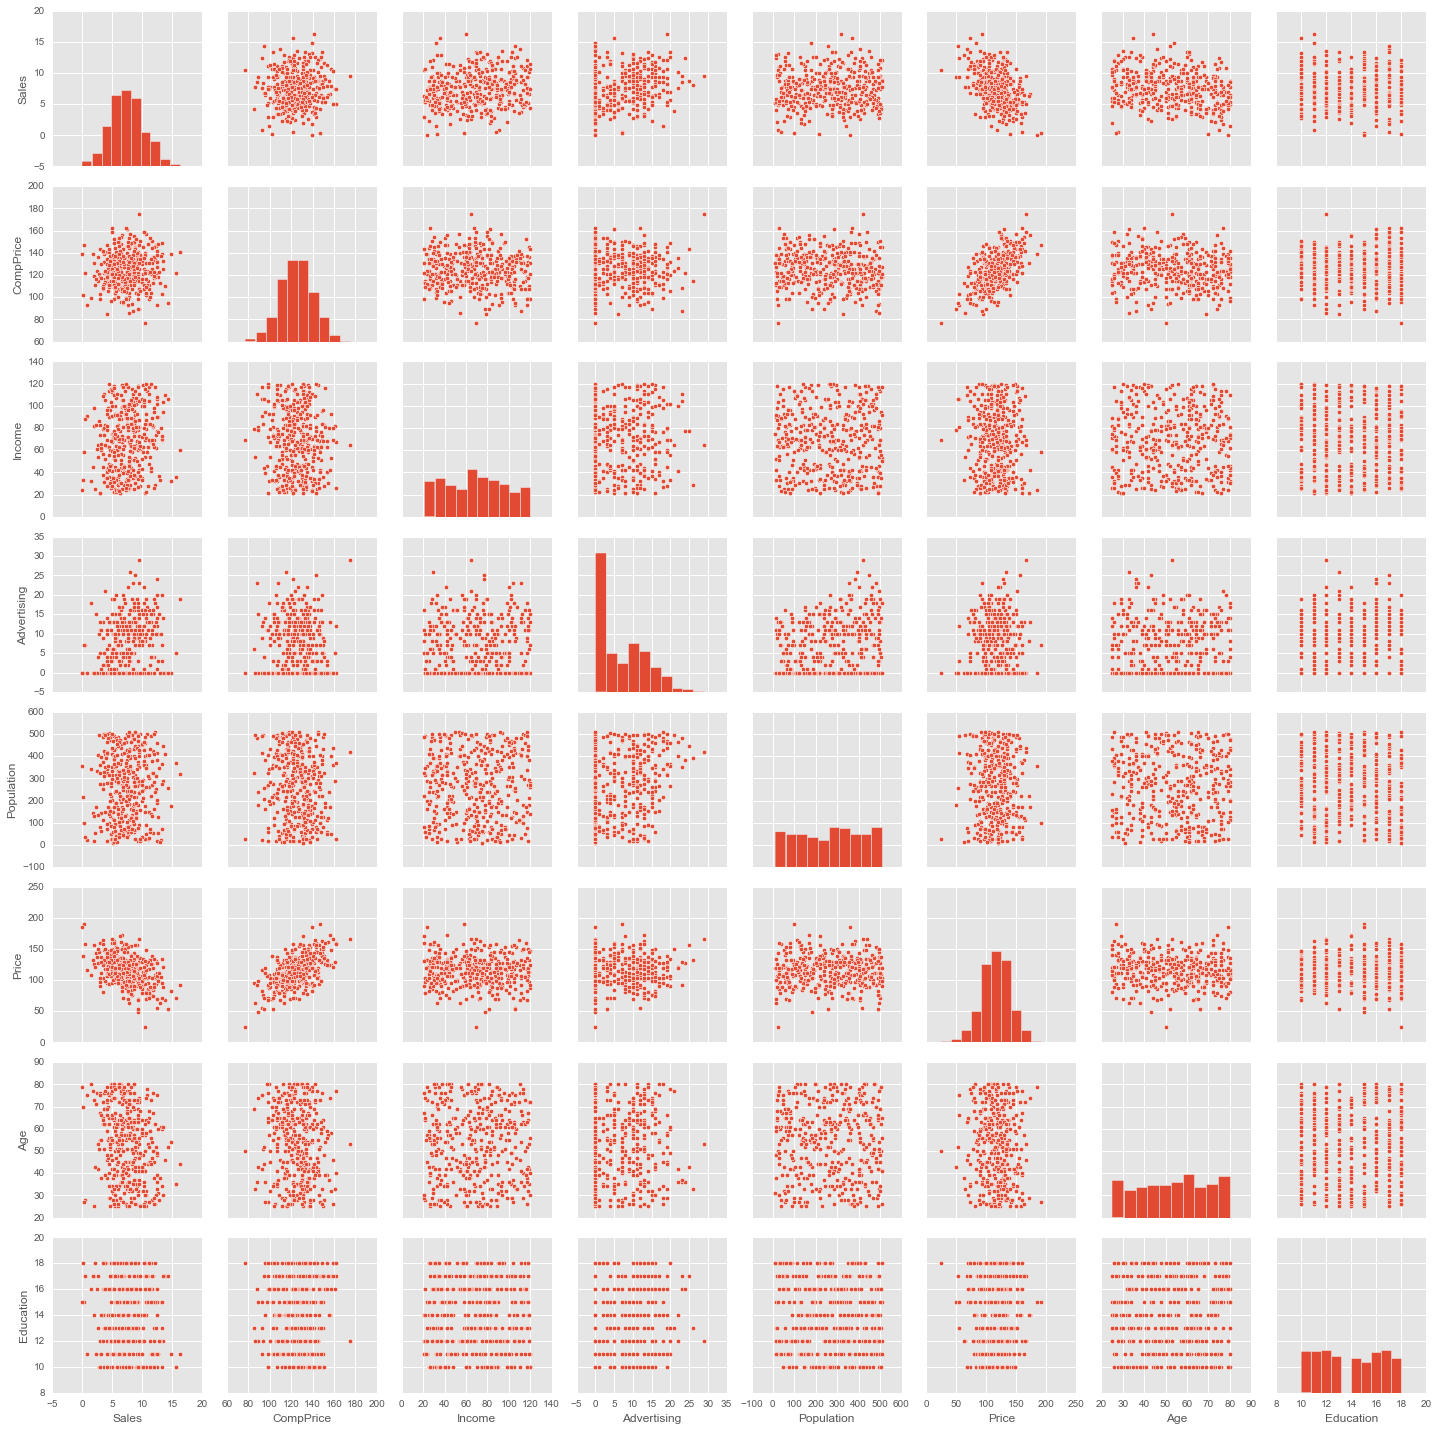

In [58]:
# Visualizing the data
sns.pairplot(data = df)

In [59]:
# Creating a new Feature 'High' that will be Yes when Sales >8 and no otherwise
# Idea is to transform the variables 
df['High'] = 0

In [60]:
df.loc[(df.Sales > 8) , 'High'] = 1

In [61]:
df.High.value_counts()

0    236
1    164
Name: High, dtype: int64

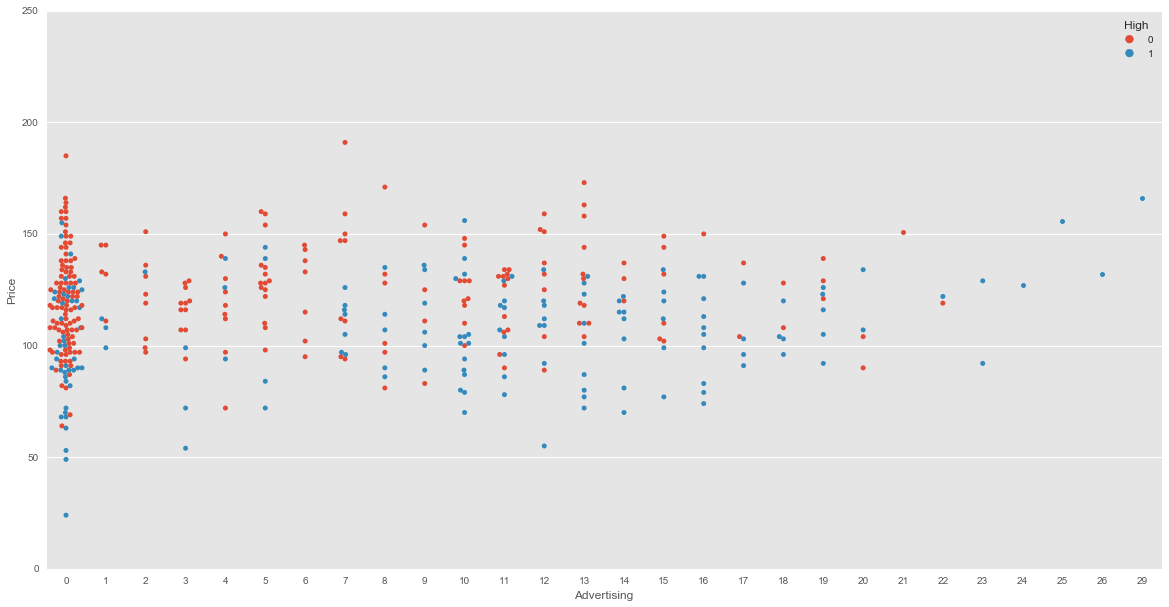

In [62]:
plt.figure(figsize = (20,10))
sns.swarmplot(x = 'Advertising' , y = 'Price' , hue = 'High' , data = df)

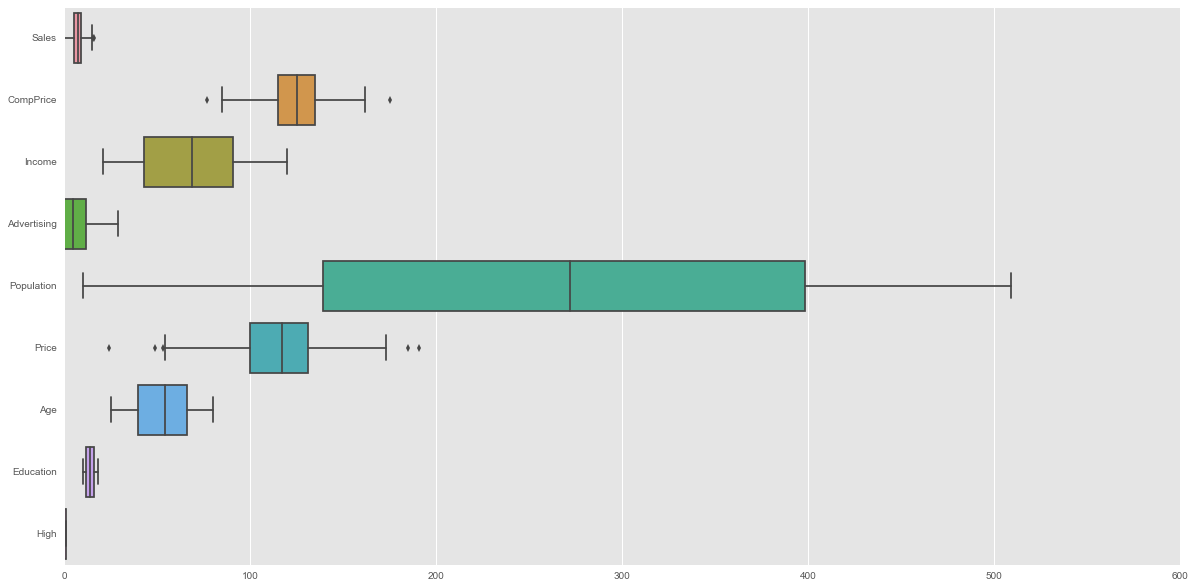

In [201]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df , orient = 'h')

In [64]:
# Create Predictors and response variables
X = df[['CompPrice' , 'Income' , 'Advertising' , 'Population' , 'Price' , 'Age' , 'Education']]
y = df.High

In [149]:
# Splitting the data into test and training test
train_X , test_X , train_y , test_y = cross_validation.train_test_split(X , y , test_size = .2)

In [150]:
len(train_X.columns)

7

In [66]:
model_dtree = tree.DecisionTreeClassifier().fit(train_X , train_y)


In [151]:
y_hat = model_dtree.predict(train_X)
y_hat_test = model_dtree.predict(test_X)

In [152]:
#Checking the Cross validation Score
cross_validation.cross_val_score(model_dtree , train_X , train_y , cv = 10).mean()

0.66173020527859239

In [69]:
# Checking the accuracy on the training data
(train_y ==y_hat).mean()

1.0

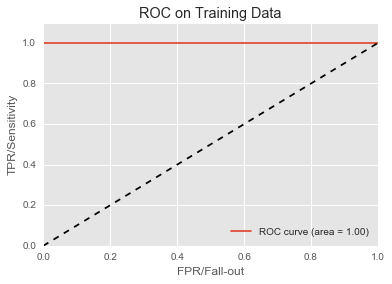

In [70]:
fpr, tpr, thresholds = metrics.roc_curve(train_y, y_hat)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("ROC on Training Data")
plt.legend(loc = 'lower right')
plt.show()

In [71]:
(test_y == y_hat_test).mean()

0.65000000000000002

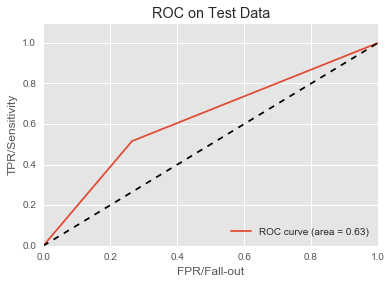

In [72]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, y_hat_test)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("ROC on Test Data")
plt.legend(loc = 'lower right')
plt.show()

In [73]:
model_dtree.feature_importances_

array([ 0.12962855,  0.1532815 ,  0.14828617,  0.10125416,  0.30881911,
        0.1089934 ,  0.04973711])

In [142]:
sorted(zip(model_dtree.feature_importances_, X.columns.values), reverse = True)

[(0.30881910812372665, 'Price'),
 (0.15328150153169631, 'Income'),
 (0.14828617491253174, 'Advertising'),
 (0.12962854821156597, 'CompPrice'),
 (0.10899340300670207, 'Age'),
 (0.10125415512240016, 'Population'),
 (0.04973710909137713, 'Education')]

# Price seems to be the most important feature in making this decision
- Seems that the 'price' followed by Advertising brings down the most reduction in the GINI index

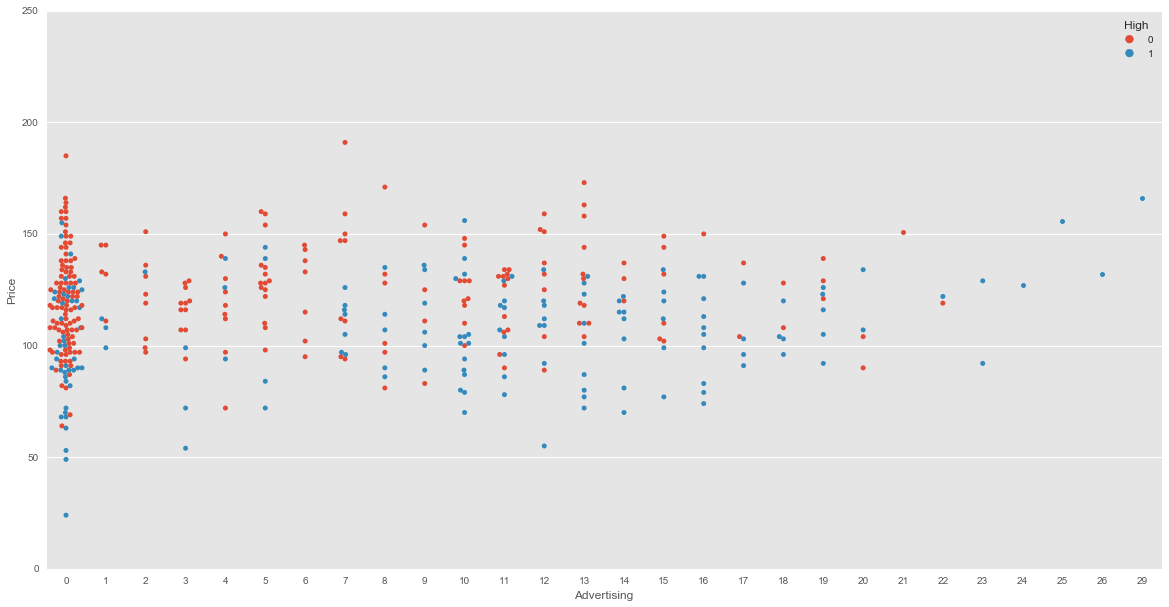

In [74]:
plt.figure(figsize = (20,10))
sns.swarmplot(x = 'Advertising' , y = 'Price' , hue = 'High' , data = df)

In [75]:
test_X['Accuracy'] = False

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [76]:
test_X.loc[(y_hat_test == test_y) , 'Accuracy'] = True

In [78]:
test_X.Accuracy.value_counts()

True     52
False    28
Name: Accuracy, dtype: int64

In [83]:
# creating a Data frame to hold the results of the Test set modelling
 

result = pd.concat([test_X , test_y], axis=1)

In [84]:
result.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Accuracy,High
245,114,43,0,199,88,57,10,True,1
279,141,57,13,376,158,64,18,True,0
205,113,22,1,317,132,28,12,True,0
303,133,52,16,290,99,43,11,False,1
25,139,32,0,176,82,54,11,True,1


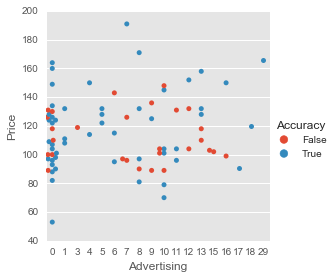

In [140]:
plt.figure(figsize = (20,10))
sns.factorplot(x="Advertising", y="Price", hue="Accuracy", data=result, kind="swarm");

## Analysis of Results

In [95]:
print " The Number of features that were used when builing the model %r"  %model_dtree.n_features_

 The Number of features that were used when builing the model 7


In [108]:
print model_dtree.get_params

<bound method DecisionTreeClassifier.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')>


In [ ]:
#y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)[source]¶

In [125]:
from sklearn import *
print(metrics.classification_report(test_y , y_hat_test))

             precision    recall  f1-score   support

          0       0.71      0.73      0.72        49
          1       0.55      0.52      0.53        31

avg / total       0.65      0.65      0.65        80



In [129]:
len(result[(result.Accuracy*1 == result.High)])

29

In [136]:
%load_ext gvmagic


The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


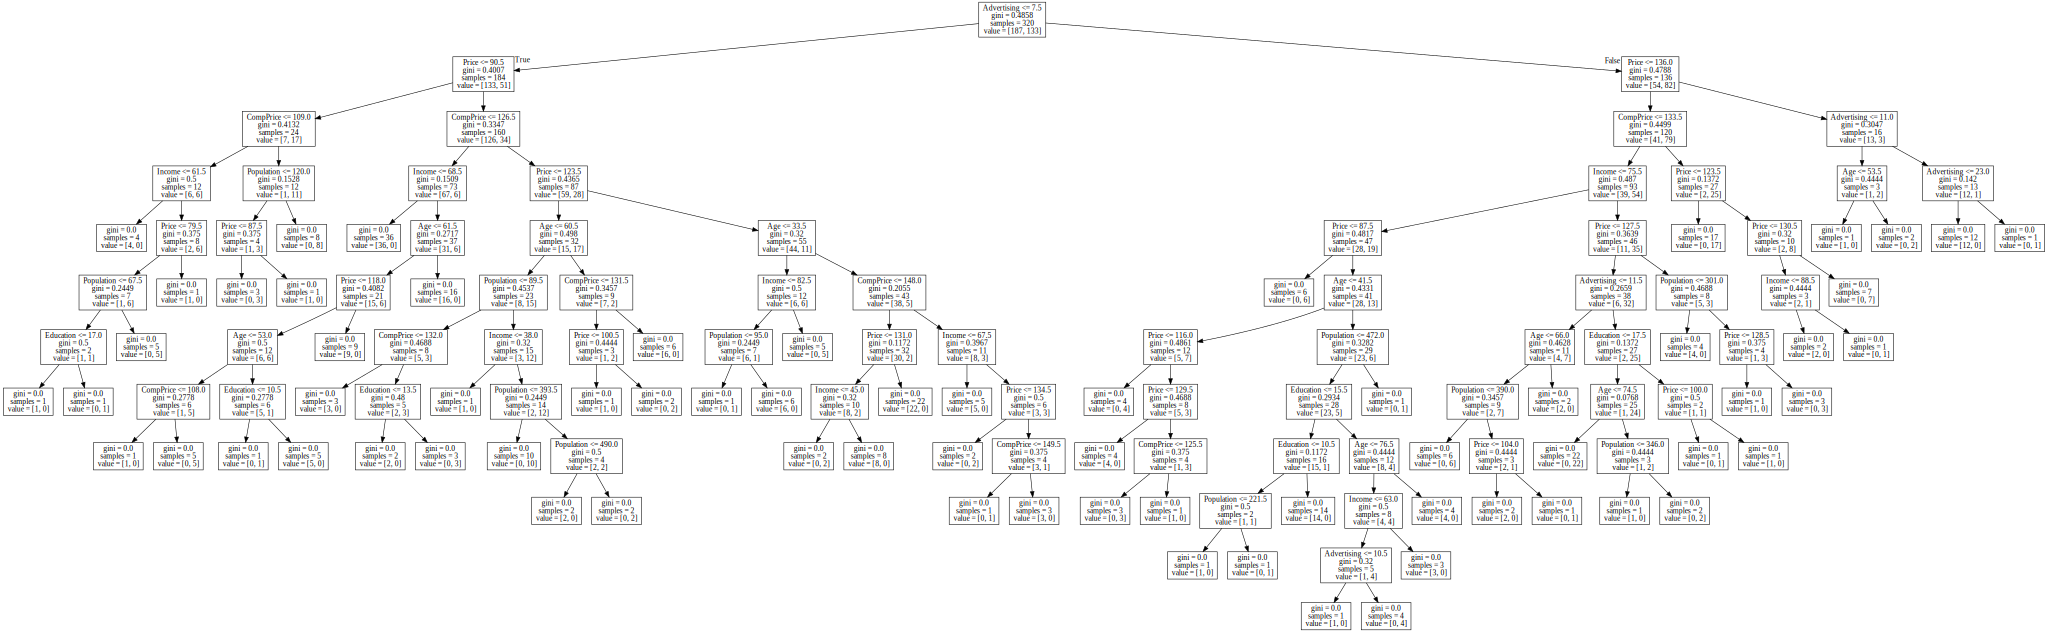

In [133]:
dot_data = externals.six.StringIO()
tree.export_graphviz(model_dtree, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()



In [135]:
#Checking which features are most important in building the tree
sorted(zip(model_dtree.feature_importances_, X.columns.values), reverse = True)

[(0.30881910812372665, 'Price'),
 (0.15328150153169631, 'Income'),
 (0.14828617491253174, 'Advertising'),
 (0.12962854821156597, 'CompPrice'),
 (0.10899340300670207, 'Age'),
 (0.10125415512240016, 'Population'),
 (0.04973710909137713, 'Education')]

# Lets explore the depth to check the over/underfitting

In [144]:
model_dtree_limit = tree.DecisionTreeClassifier(max_depth =3)
model_dtree_limit.fit(train_X , train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [145]:
model_dtree_limit.score(train_X , train_y)

0.73750000000000004

In [170]:
# Lets try to use Cross validation to select the depth of the tree
tree_eval = pd.DataFrame({'Depth':np.nan , 'Train_Score':np.nan , 'CV_Score':np.nan},index = [0])

In [171]:
for i in range(1 , 25):
    model_pruned = tree.DecisionTreeClassifier(max_depth = i)
    model_pruned.fit(train_X , train_y)
    train_score = model_pruned.score(train_X , train_y)
    cv_score = cross_validation.cross_val_score(model_pruned , train_X , train_y , cv =10).mean()
    depth = i
    tree_eval.loc[i-1 , 'Depth'] = i
    tree_eval.loc[i-1 , 'Train_Score'] = train_score
    tree_eval.loc[i-1 , 'CV_Score'] = cv_score
    
    

In [172]:
tree_eval

,CV_Score,Depth,Train_Score
0,0.630935,1.0,0.690625
1,0.697468,2.0,0.709375
2,0.718976,3.0,0.765625
3,0.734027,4.0,0.828125
4,0.686636,5.0,0.875000
5,0.696212,6.0,0.912500
6,0.677557,7.0,0.934375
7,0.674230,8.0,0.965625
8,0.661907,9.0,0.984375
9,0.680676,10.0,0.996875


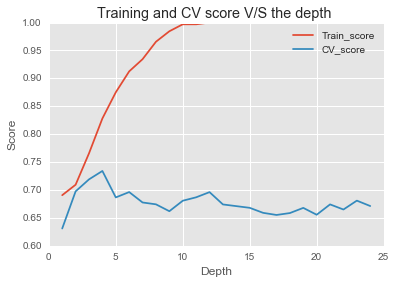

In [180]:

plt.plot(tree_eval.Depth , tree_eval.Train_Score , label = 'Train_score')
plt.plot(tree_eval.Depth , tree_eval.CV_Score , label = 'CV_score')
plt.title('Training and CV score V/S the depth ')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.legend(loc = 'best')

In [184]:
tree_eval.loc[(tree_eval.CV_Score == tree_eval.CV_Score.max())]

,CV_Score,Depth,Train_Score
3,0.734027,4.0,0.828125


## Conclusion:- The best tree is the tree that has a depth of 4 and it has a CV score of .73 and Test score of .82

In [186]:
# Calculating the Test Score on the Tree wirh Depth -4
model_dtree4 = tree.DecisionTreeClassifier(max_depth = 4) 
model_dtree4.fit(train_X , train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [188]:
y_hat_4 = model_dtree4.predict(test_X)

In [189]:
(y_hat_4 == test_y).mean()

0.65000000000000002

In [191]:
model_dtree4.score(test_X , test_y)

0.65000000000000002

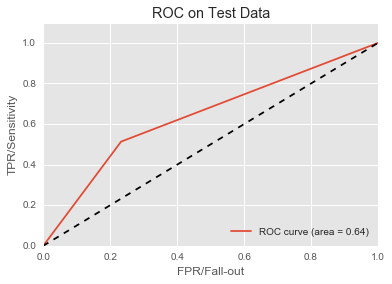

In [190]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, y_hat_4)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("ROC on Test Data")
plt.legend(loc = 'lower right')
plt.show()

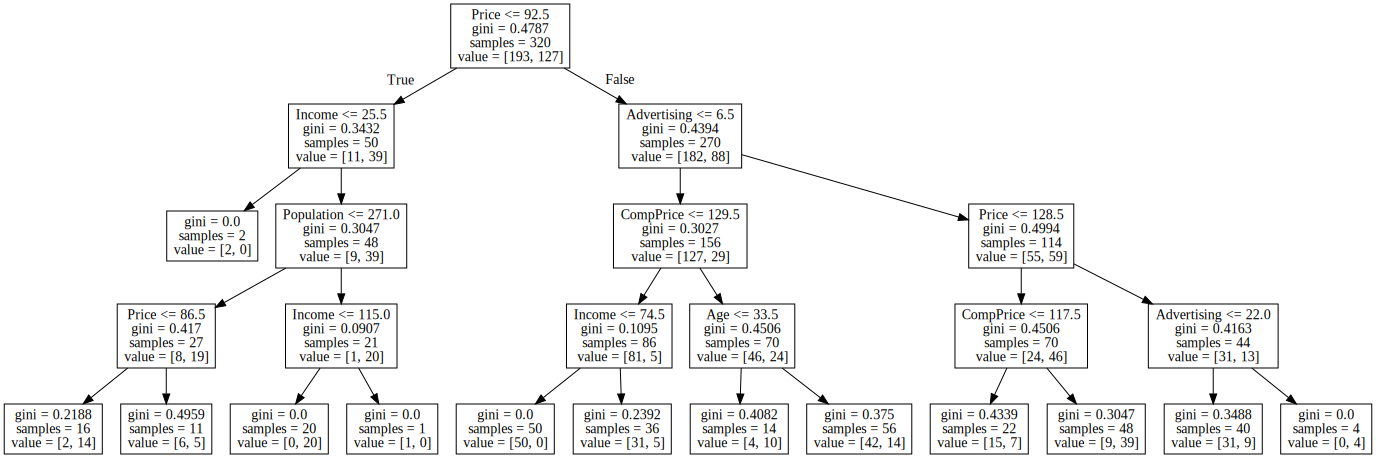

In [192]:
dot_data = externals.six.StringIO()
tree.export_graphviz(model_dtree4, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()


# Lets check the maximum leaf node

In [194]:
# Lets try to use Cross validation to select the depth of the tree
tree_leaf = pd.DataFrame({'Leaves':np.nan , 'Train_Score':np.nan , 'CV_Score':np.nan},index = [0])

In [196]:
for i in range(1 , 25):
    model_leaf = tree.DecisionTreeClassifier(max_leaf_nodes = i+1)
    model_leaf.fit(train_X , train_y)
    train_score = model_pruned.score(train_X , train_y)
    cv_score = cross_validation.cross_val_score(model_leaf , train_X , train_y , cv =10).mean()
    depth = i
    tree_leaf.loc[i-1 , 'Leaves'] = i
    tree_leaf.loc[i-1 , 'Train_Score'] = train_score
    tree_leaf.loc[i-1 , 'CV_Score'] = cv_score
    
    

In [198]:
tree_leaf

,CV_Score,Leaves,Train_Score
0,0.630935,1.0,1.0
1,0.684766,2.0,1.0
2,0.709778,3.0,1.0
3,0.730996,4.0,1.0
4,0.740283,5.0,1.0
5,0.734418,6.0,1.0
6,0.724734,7.0,1.0
7,0.727670,8.0,1.0
8,0.746331,9.0,1.0
9,0.743206,10.0,1.0


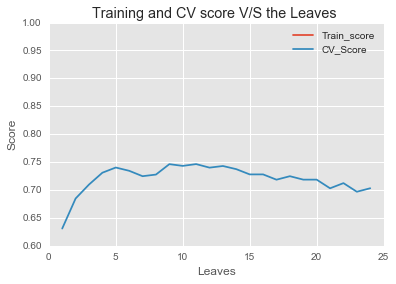

In [200]:
plt.plot(tree_leaf.Leaves , tree_leaf.Train_Score , label = 'Train_score')
plt.plot(tree_leaf.Leaves , tree_leaf.CV_Score , label = 'CV_Score')
plt.title('Training and CV score V/S the Leaves ')
plt.xlabel('Leaves')
plt.ylabel('Score')
plt.legend(loc = 'best')

### CV on max Leaf nodes and max depth gives similar results 